# Here is a list of things that i want to explore
What is the most viable place to work in as a data scientist 


In [91]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px


data=pd.read_csv("ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
data["company_location"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [4]:
data["work_year"].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [5]:
locations = [ 'IN','DE', 'SG']

# Filter the DataFrame based on whether the 'company_location' column value is in the list
filtered_data = data[data['company_location'].isin(locations)]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 21 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           120 non-null    int64 
 1   experience_level    120 non-null    object
 2   employment_type     120 non-null    object
 3   job_title           120 non-null    object
 4   salary              120 non-null    int64 
 5   salary_currency     120 non-null    object
 6   salary_in_usd       120 non-null    int64 
 7   employee_residence  120 non-null    object
 8   remote_ratio        120 non-null    int64 
 9   company_location    120 non-null    object
 10  company_size        120 non-null    object
dtypes: int64(4), object(7)
memory usage: 11.2+ KB


In [6]:
filtered_data["salary_currency"].unique()

array(['USD', 'INR', 'EUR', 'SGD', 'PLN'], dtype=object)

In [7]:
filtered_data.loc[filtered_data["salary_currency"]=="HUF"]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


Index 3574 not found in the DataFrame


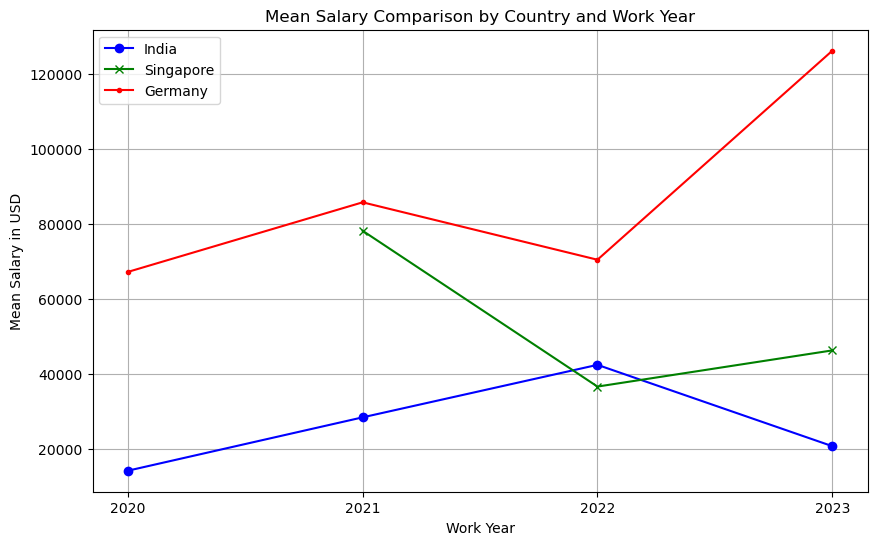

In [101]:
if 3574 in filtered_data.index:
    filtered_data=filtered_data.drop([3574], inplace=True)
else:
    print("Index 3574 not found in the DataFrame")

india_data=filtered_data.loc[filtered_data["company_location"]=="IN"].groupby("work_year").agg({"salary_in_usd":["mean"]})
singapore_data=filtered_data.loc[filtered_data["company_location"]=="SG"].groupby("work_year").agg({"salary_in_usd":["mean"]})
germany_data=filtered_data.loc[filtered_data["company_location"]=="DE"].groupby("work_year").agg({"salary_in_usd":["mean"]})
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot India data
plt.plot(india_data.index, india_data["salary_in_usd"], marker='o', linestyle='-', color='blue', label='India')

# Plot Singapore data
plt.plot(singapore_data.index, singapore_data["salary_in_usd"], marker='x', linestyle='-', color='green', label='Singapore')

# Plot Germany data
plt.plot(germany_data.index, germany_data["salary_in_usd"], marker='.', linestyle='-', color='red', label='Germany')

# Add labels and title
plt.xlabel('Work Year')
plt.ylabel('Mean Salary in USD')
plt.title('Mean Salary Comparison by Country and Work Year')
plt.legend()  # Show legend based on labels

# Display the plot
plt.grid(True)  # Add a grid
plt.show()


first thing you have to do is to check if this is a growing market and if there is a increase in demand of personnel working in the feild of data science, I have also filtered the data according to my preference since i dont really care about the countries that im not keen on applying to.

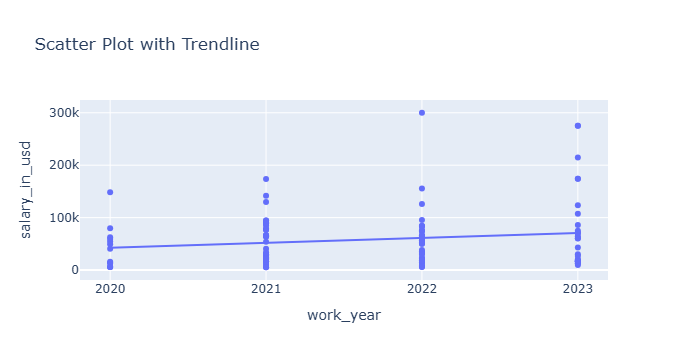

In [24]:
filtered_data['work_year'] = filtered_data['work_year'].astype(str)
custom_order = [2020, 2021, 2022, 2023]
fig = px.scatter(filtered_data, x='work_year', y='salary_in_usd', trendline='ols', title='Scatter Plot with Trendline')

# Show the plot
fig.show()

In [95]:
india_data

,salary_in_usd
,mean
work_year,
2020,14219.666667
2021,28433.500000
2022,42417.650000
2023,20760.666667


In [77]:
correlation = data['work_year'].corr(data['salary_in_usd'])
correlation


0.22829002243287855

this implies that there is a week positive correlation witht the salaries that people in the data science feild are getting, this might not be condusive to the reality because the time scape overlaps with covid, however the fact that there is a slight positive correlation is still to be noted

In [51]:
mean_salaries
country_mapping = {
    'ES': 'ESP',  # Spain
    'US': 'USA',  # United States
    'CA': 'CAN',  # Canada
    'DE': 'DEU',  # Germany
    'GB': 'GBR',  # United Kingdom
    'NG': 'NGA',  # Nigeria
    'IN': 'IND',  # India
    'HK': 'HKG',  # Hong Kong
    'NL': 'NLD',  # Netherlands
    'CH': 'CHE',  # Switzerland
    'CF': 'CAF',  # Central African Republic
    'FR': 'FRA',  # France
    'FI': 'FIN',  # Finland
    'UA': 'UKR',  # Ukraine
    'IE': 'IRL',  # Ireland
    'IL': 'ISR',  # Israel
    'GH': 'GHA',  # Ghana
    'CO': 'COL',  # Colombia
    'SG': 'SGP',  # Singapore
    'AU': 'AUS',  # Australia
    'SE': 'SWE',  # Sweden
    'SI': 'SVN',  # Slovenia
    'MX': 'MEX',  # Mexico
    'BR': 'BRA',  # Brazil
    'PT': 'PRT',  # Portugal
    'RU': 'RUS',  # Russia
    'TH': 'THA',  # Thailand
    'HR': 'HRV',  # Croatia
    'VN': 'VNM',  # Vietnam
    'EE': 'EST',  # Estonia
    'AM': 'ARM',  # Armenia
    'BA': 'BIH',  # Bosnia and Herzegovina
    'KE': 'KEN',  # Kenya
    'GR': 'GRC',  # Greece
    'MK': 'MKD',  # North Macedonia
    'LV': 'LVA',  # Latvia
    'RO': 'ROU',  # Romania
    'PK': 'PAK',  # Pakistan
    'IT': 'ITA',  # Italy
    'MA': 'MAR',  # Morocco
    'PL': 'POL',  # Poland
    'AL': 'ALB',  # Albania
    'AR': 'ARG',  # Argentina
    'LT': 'LTU',  # Lithuania
    'AS': 'ASM',  # American Samoa
    'CR': 'CRI',  # Costa Rica
    'IR': 'IRN',  # Iran
    'BS': 'BHS',  # Bahamas
    'HU': 'HUN',  # Hungary
    'AT': 'AUT',  # Austria
    'SK': 'SVK',  # Slovakia
    'CZ': 'CZE',  # Czech Republic
    'TR': 'TUR',  # Turkey
    'PR': 'PRI',  # Puerto Rico
    'DK': 'DNK',  # Denmark
    'BO': 'BOL',  # Bolivia
    'PH': 'PHL',  # Philippines
    'BE': 'BEL',  # Belgium
    'ID': 'IDN',  # Indonesia
    'EG': 'EGY',  # Egypt
    'AE': 'ARE',  # United Arab Emirates
    'LU': 'LUX',  # Luxembourg
    'MY': 'MYS',  # Malaysia
    'HN': 'HND',  # Honduras
    'JP': 'JPN',  # Japan
    'DZ': 'DZA',  # Algeria
    'IQ': 'IRQ',  # Iraq
    'CN': 'CHN',  # China
    'NZ': 'NZL',  # New Zealand
    'CL': 'CHL',  # Chile
    'MD': 'MDA',  # Moldova
    'MT': 'MLT'   # Malta
}
def country(con):
    return country_mapping[con]
    
data["iso3 alpha"]=data["company_location"].apply(country)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,iso3 alpha
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,ESP
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,USA
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,USA
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,CAN
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,USA
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,USA
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,USA
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,USA


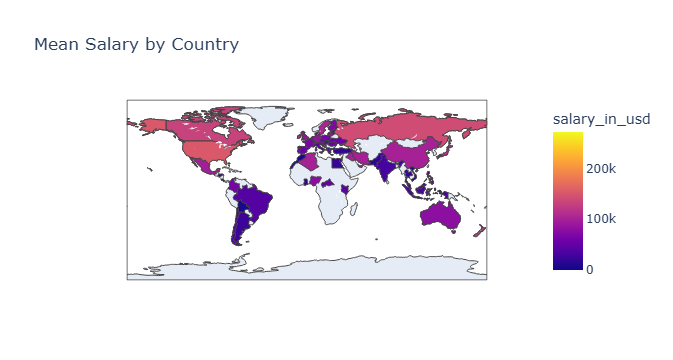

In [69]:
mean_salaries = data.groupby('iso3 alpha')['salary_in_usd'].mean().reset_index()
# Create a choropleth map using Plotly
fig = px.choropleth(
    mean_salaries,
    locations='iso3 alpha',         # DataFrame column with ISO Alpha-3 codes
    color='salary_in_usd',         # DataFrame column with color values
    hover_name='iso3 alpha',  # DataFrame column to add to hover information
    locationmode='ISO-3',           # Set to plot based on ISO Alpha-3 codes
    color_continuous_scale='Plasma',  # Color scale
    range_color=(0, mean_salaries['salary_in_usd'].max()),  # Range of color scale
    title='Mean Salary by Country'  # Title of the plot
)

# Show the plot
fig.show()

In [63]:
mean_salaries

,iso3 alpha,salary_in_usd
0,ALB,10000.000000
1,ARE,100000.000000
2,ARG,25000.000000
3,ARM,50000.000000
4,ASM,29351.000000
...,...,...
67,THA,23064.333333
68,TUR,19058.000000
69,UKR,57850.000000
70,USA,151822.009539


In [103]:
!pip install streamlit

